In [69]:
# This script was made by Joan Mateu Horrach. It is UNIQUELY designed to plot 
# the output data from QuinCe. Previous to its usage it is required to merge 
# all the data files in a unique .csv

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

In [70]:
# Specify the path to the merged data set.
datapath='input/Finnmaid/34FM20230216/dataset/ICOS OTC Labelling/34FM20230216.csv'
df=pd.read_csv(datapath)


/var/folders/g8/m0fg5h2j2jn0jc5nwl_l0fvh0000gn/T/ipykernel_25229/755076813.py:2: DtypeWarning: Columns (3,7,31,55,58,72,81,84,96) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(datapath)


In [71]:
# Select the datetime and keep it as a variable. 
dt=pd.to_datetime(df['Date/Time'])
dt

0        2023-02-16 03:03:00+00:00
1        2023-02-16 03:04:00+00:00
2        2023-02-16 03:05:00+00:00
3        2023-02-16 03:06:01+00:00
4        2023-02-16 03:07:01+00:00
                    ...           
146073   2023-06-07 06:55:00+00:00
146074   2023-06-07 06:56:00+00:00
146075   2023-06-07 06:57:00+00:00
146076   2023-06-07 06:58:00+00:00
146077   2023-06-07 06:59:00+00:00
Name: Date/Time, Length: 146078, dtype: datetime64[ns, UTC]

In [72]:
# x, y are the plotting variables. 
x = dt
y = df['S4_H2O'].values

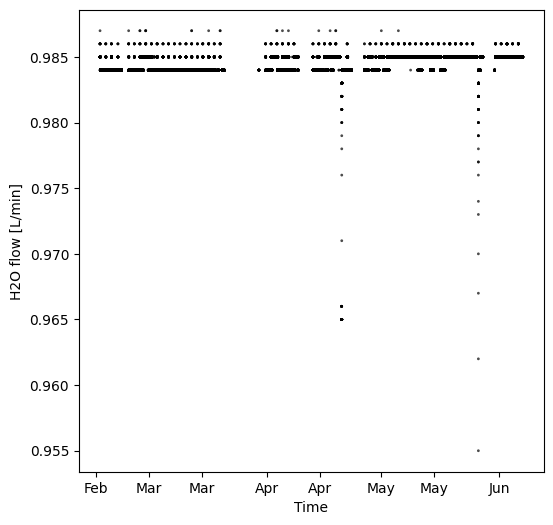

In [73]:
# PLOTTING THE EQUILIBRATOR PUMP FLOW


# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size
# Define a condition for coloring points
condition = y < 0.1

# Scatter plot for points with y < 20 (red)
plt.scatter(x[condition], y[condition], marker='o', s=1, edgecolor='red',facecolors='none', label='y < 20', alpha=0.7)

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[~condition], y[~condition], marker='o',s=1, edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))


# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('H2O flow [L/min]')


# Add a title if needed
plt.title('')

# Specify the file path and name
output_path = "/Users/joanmateuhorrachpou/WORK/QUINCE/x.Scripts_OLD/Summary_and_plot_script/output/Finnmaid/8.Eq_Pump_measured_plot_own_range.png"

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

In [74]:
x = dt
y = df['Pressure in Equilibrator'].values

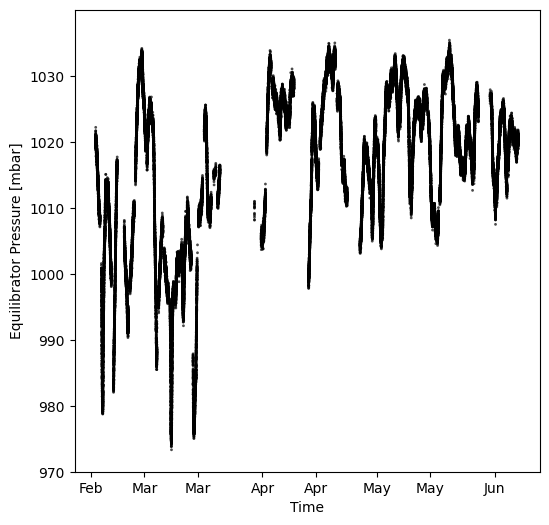

In [75]:
# PLOTTING THE EQUILIBRATOR PRESSURE

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size

plt.scatter(x, y, s=1, marker='o', edgecolor='k',facecolors='none', alpha=0.7)  # 'o' marker, blue color, transparency

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))


# Set y-axis tick positions and labels from 0 to 120
plt.yticks(np.arange(900, 1040, step=10))  # Adjust the step value as needed
plt.ylim(970,1040)
# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('Equilibrator Pressure [mbar]')

# Add a title if needed
plt.title('')

# Specify the file path and name
output_path = "/Users/joanmateuhorrachpou/WORK/QUINCE/x.Scripts_OLD/Summary_and_plot_script/output/Finnmaid/4.Equil_Pressplot_own-range.png"

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

In [76]:
x = dt
y = df['fCO2 [uatm]'].values

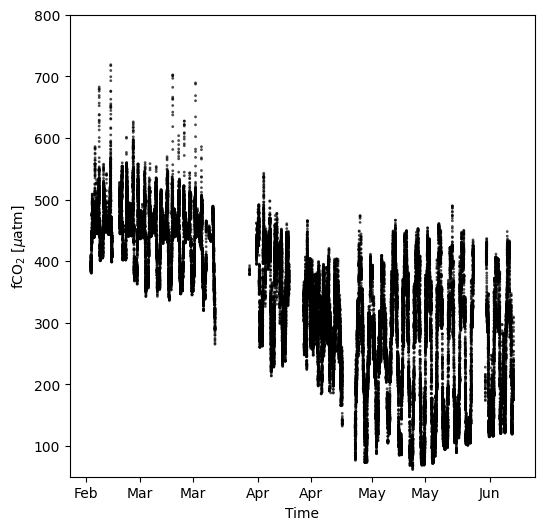

In [77]:
# PLOTTING FCO2


# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size
# Define a condition for coloring points
condition = df['fCO2 [uatm] QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))



# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('fCO$_2$ [$\mu$atm]')
plt.ylim(50,800)
# Add a title if needed
plt.title('')

# Specify the file path and name
output_path = "/Users/joanmateuhorrachpou/WORK/QUINCE/x.Scripts_OLD/Summary_and_plot_script/output/Finnmaid/9.fCO2_own-range.png"

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

In [78]:
x = df['S4_14CO2w'].values
y = df['fCO2 [uatm]'].values

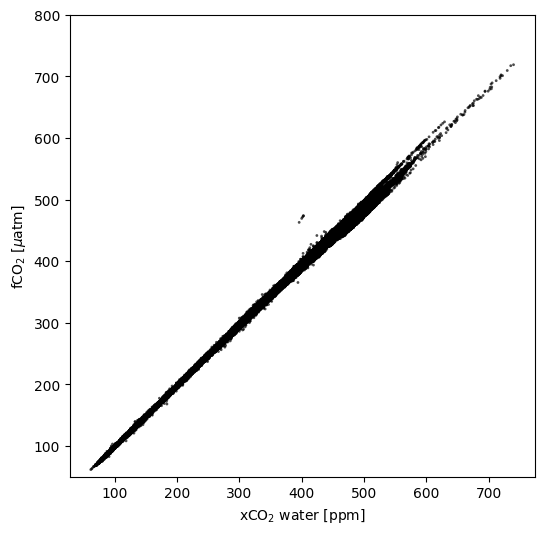

In [79]:
# PLOTTING fCO2 VS xCO2
# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size
# Define a condition for coloring points
condition = df['fCO2 [uatm] QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)



# Add labels to the x and y axes
plt.xlabel('xCO$_2$ water [ppm]')
plt.ylabel('fCO$_2$ [$\mu$atm]')
plt.ylim(50,800)

# Specify the file path and name
output_path = "/Users/joanmateuhorrachpou/WORK/QUINCE/x.Scripts_OLD/Summary_and_plot_script/output/Finnmaid/10.fCO2_vs_xCO2_own-range.png"

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

In [80]:
x = dt
y = df['S4_14CO2w'].values

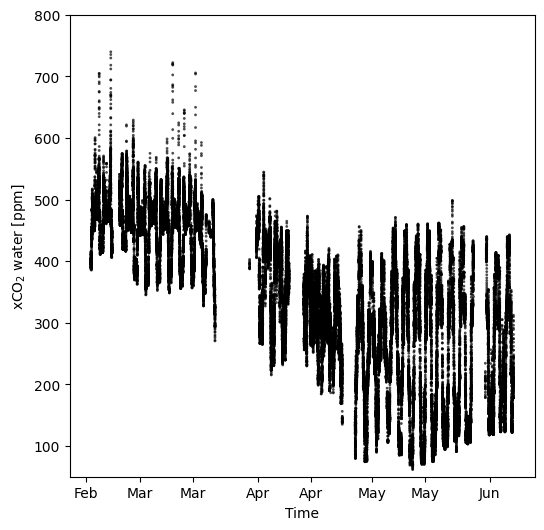

In [81]:
# PLOTTING xCO2

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size
# Define a condition for coloring points
condition = df['fCO2 [uatm] QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))



# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('xCO$_2$ water [ppm]')
plt.ylim(50,800)

# Specify the file path and name
output_path = "/Users/joanmateuhorrachpou/WORK/QUINCE/x.Scripts_OLD/Summary_and_plot_script/output/Finnmaid/5.CO2_measured_plot_own-range.png"

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()

In [82]:
x = dt
y = df['EQ2_T'].values

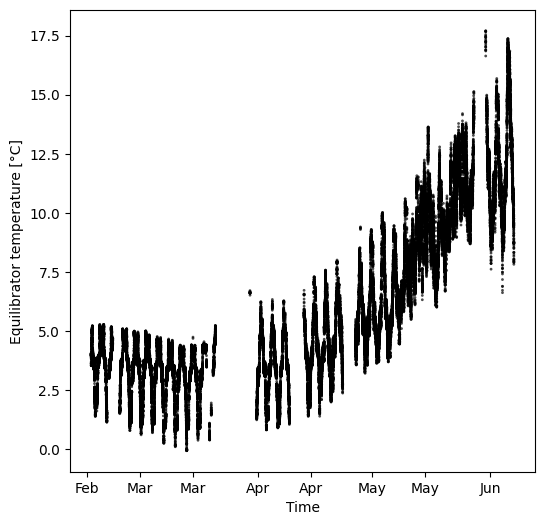

In [83]:
# PLOTTING EQUILIBRATOR TEMPERATURE

# Create a scatter plot
plt.figure(figsize=(6, 6))  # Optional: set the figure size
# Define a condition for coloring points
condition = df['fCO2 [uatm] QC Flag']== 2

# Scatter plot for points with y >= 20 (black)
plt.scatter(x[condition], y[condition],s=1, marker='o', edgecolor='black',facecolors='none', label='y >= 20', alpha=0.7)

# Format the x-axis tick labels to show only months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))



# Add labels to the x and y axes
plt.xlabel('Time')
plt.ylabel('Equilibrator temperature [°C]')


# Specify the file path and name
output_path = "/Users/joanmateuhorrachpou/WORK/QUINCE/x.Scripts_OLD/Summary_and_plot_script/output/Finnmaid/2.Equil_temp_plot_own-range.png"

# Save the plot as a PNG file with high quality
plt.savefig(output_path, dpi=400, bbox_inches='tight')

# Show the plot (optional)
plt.show()